In [1]:
from inference.run_inference import scrape_and_predict
from utils import get_project_root, pickle_save, pickle_load
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
from wordcloud import WordCloud, STOPWORDS
from pathlib import Path
from sentiment_model.data_utils.tweet_dataset import tokenize, process_token_list
import os
from visualisation.plotting import plot_stacked_bar, plot_date_dist, plot_sentiment, plot_text_lengths, plot_word_cloud
#plt.style.use('dark_background')
#plt.style.use('seaborn-notebook')
import datetime

In [14]:
# crypto
# Elon Musk
SAVING = True
keyword = ["Qatar", "World Cup"]
keyword = ["Elon", "Musk"]
keyword = ["Bitcoin", "Crypto"]
keyword = ['vegan', 'veganism', 'vegetarian', 'plant based', 'veggie']
keyword = ['Donald Trump', 'Trump']
keyword = ['iPhone']
#keyword = ['dairy', 'cow milk']

In [37]:
sentiment, text_sentiment, tweet_df = scrape_and_predict(keyword=keyword, start_date="2021-01-1", end_date="now", max_tweets=25000)

Using custom data configuration SetFit--tweet_sentiment_extraction-60a81958566f1313
Found cached dataset json (C:/Users/20172613/.cache/huggingface/datasets/SetFit___json/SetFit--tweet_sentiment_extraction-60a81958566f1313/0.0.0/e6070c77f18f01a5ad4551a8b7edfba20b8438b7cad4d94e6ad9378022ce4aab)


  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 6/6 [00:02<00:00,  2.50it/s]


In [38]:
if SAVING:
    df_name = "_".join(keyword) if type(keyword) == list else keyword
    df_save_path = os.path.join(get_project_root(), Path(f"sentiment_model/checkpoints/scraped_dataset/df_{df_name}.p"))
    pickle_save(tweet_df, df_save_path)

In [39]:
df_name = "_".join(keyword) if type(keyword) == list else keyword
df_save_path = os.path.join(get_project_root(), Path(f"sentiment_model/checkpoints/scraped_dataset/df_{df_name}.p"))
tweet_df = pickle_load(df_save_path)

In [49]:
df_sub = tweet_df[("2021-6-22" < tweet_df['date']) & (tweet_df['date']<="2021-7-22")]

,id,date,content,sourceLabel,user,sentiment_label,text_length
2157,1417820488907251718,2021-07-21 12:15:21+00:00,As we all know bitcoin was dipping the last da...,Twitter for Android,Schedden,negative,272
2158,1417816414971260928,2021-07-21 11:59:09+00:00,@j4jeswin Bitcoin has the same value as some p...,Twitter for Android,ajaychandthakur,negative,111
2159,1417799219893587970,2021-07-21 10:50:50+00:00,@TOKAU_JP @Naruto_Anime_EN This is my fav anim...,Twitter for Android,BebasPemikir,positive,222
2160,1417797461226237957,2021-07-21 10:43:50+00:00,@scottmelker Bitcoin is the coolest Prima Donn...,Twitter for iPhone,HermsenMarcus,neutral,94
2161,1417652176671883269,2021-07-21 01:06:32+00:00,If you bought bitcoin at the start of the year...,Twitter Web App,irishcryptobro,positive,91
...,...,...,...,...,...,...,...
7631,1407327581486161924,2021-06-22 13:20:16+00:00,And from the days of $Btc until now the kingdo...,Twitter for Android,UEkpete,negative,123
7632,1407287493066727424,2021-06-22 10:40:59+00:00,"@HukAleksandra Just thinking about the ""hedge ...",Twitter for Android,TheLearner73,negative,267
7633,1407275271560986629,2021-06-22 09:52:25+00:00,@NischalShetty sir i deposited rs 601rupees on...,Twitter for Android,VikramN63363502,negative,191
7634,1407163604982538245,2021-06-22 02:28:41+00:00,@HiBlockTalks @AnRKeyX AnRKey X has partnered ...,Twitter for Android,zambrano_li,positive,300


In [34]:
df_sub = tweet_df[(tweet_df['date'].dt.month.isin([8,9,10,11])) & (tweet_df['date'].dt.year==2016)]
df_sub = tweet_df[(tweet_df['date'].dt.year.isin([2021,2022]))]
#df_sub[df_sub['sentiment_label'] == "negative"]


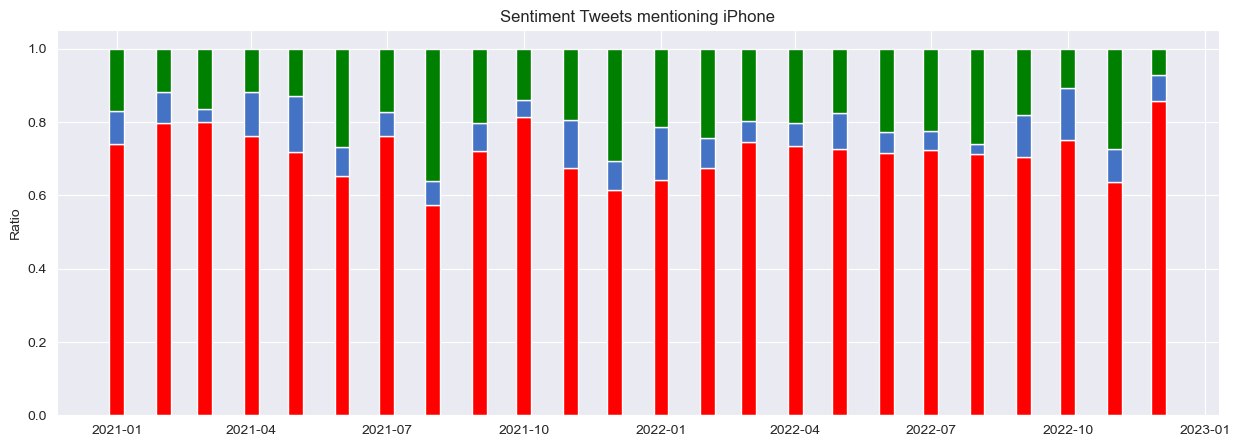

In [36]:
plot_df, fig= plot_stacked_bar(df_sub, by="month", title="Sentiment Tweets mentioning iPhone")
fig.savefig(f"visualisation/figures/{df_name}_2021_2022_sentiment_ratio.png", dpi=400)

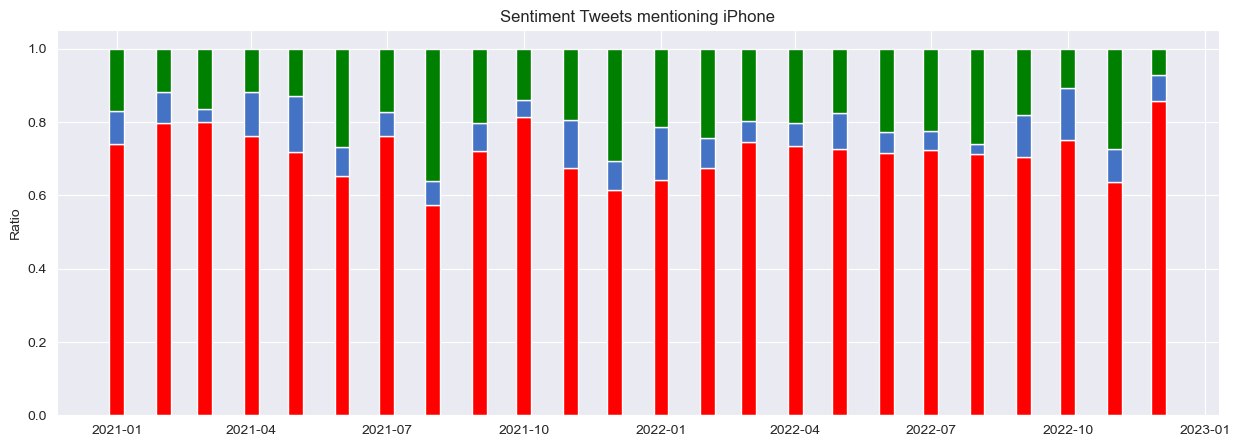

In [40]:
plot_df, fig = plot_stacked_bar(tweet_df, by="month", title="Sentiment Tweets mentioning iPhone")
fig.savefig(f"visualisation/figures/{df_name}_sentiment_ratio.png", dpi=400)

In [142]:
ax = fig.get_axes()[0]
ax.arrow(datetime.date(2021, 5, 13), 1.15, 0, -0.07, width=2.5, head_length=0.05, facecolor='r', edgecolor='black')
ax.arrow(datetime.date(2021, 5, 16), 1.2, 0, -0.05, width=2.5, head_length=0.05, facecolor='r', edgecolor='black')
ax.arrow(datetime.date(2021, 5, 17), 1.1, 0, -0.05, width=2.5, head_length=0.05, facecolor='g', edgecolor='black')
ax.arrow(datetime.date(2021, 5, 24), 1.15, 0, -0.07, width=2.5, head_length=0.05, facecolor='g', edgecolor='black')
ax.arrow(datetime.date(2021, 6, 4), 1.15, 0, -0.07, width=2.5, head_length=0.05, facecolor='r', edgecolor='black')
ax.arrow(datetime.date(2021, 6, 13), 1.15, 0, -0.07, width=2.5, head_length=0.05, facecolor='g', edgecolor='black')
datetime.date(2021, 5, 13)
#ax.annotate("hello", xy=(datetime.date(2021, 5, 13), 1.2), arrowprops=dict(arrowstyle="->", width=0.05))
fig.savefig(f"visualisation/figures/{df_name}_sentiment_ratio.png", dpi=400)

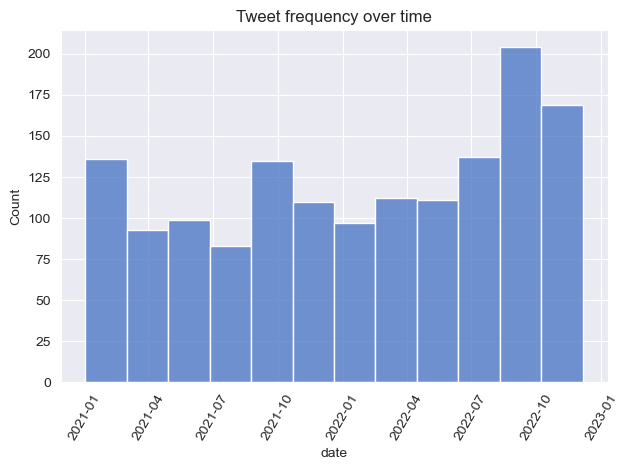

In [41]:
fig = plot_date_dist(tweet_df)
fig.tight_layout()
fig.savefig(f"visualisation/figures/{df_name}_tweet_freq.png", dpi=400)

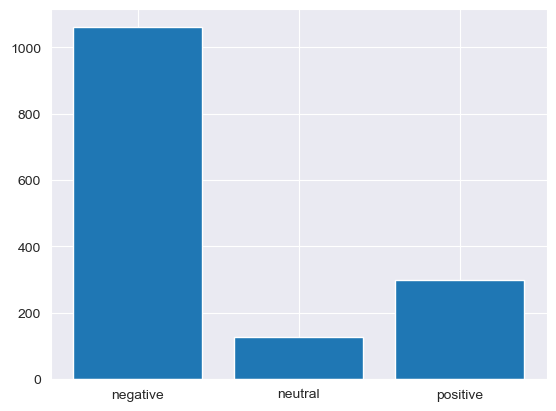

In [42]:
plot_sentiment(tweet_df)

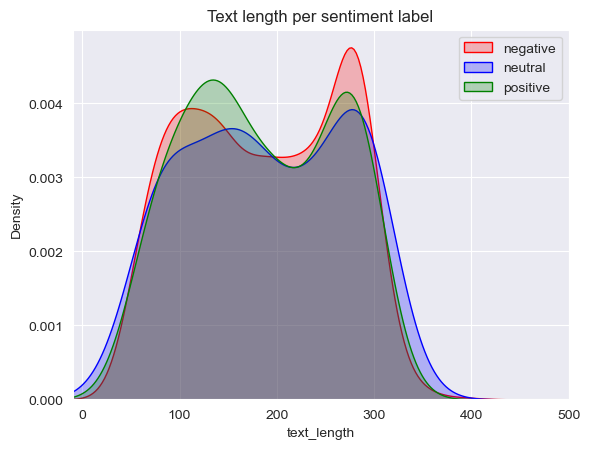

In [43]:
plot_text_lengths(tweet_df)

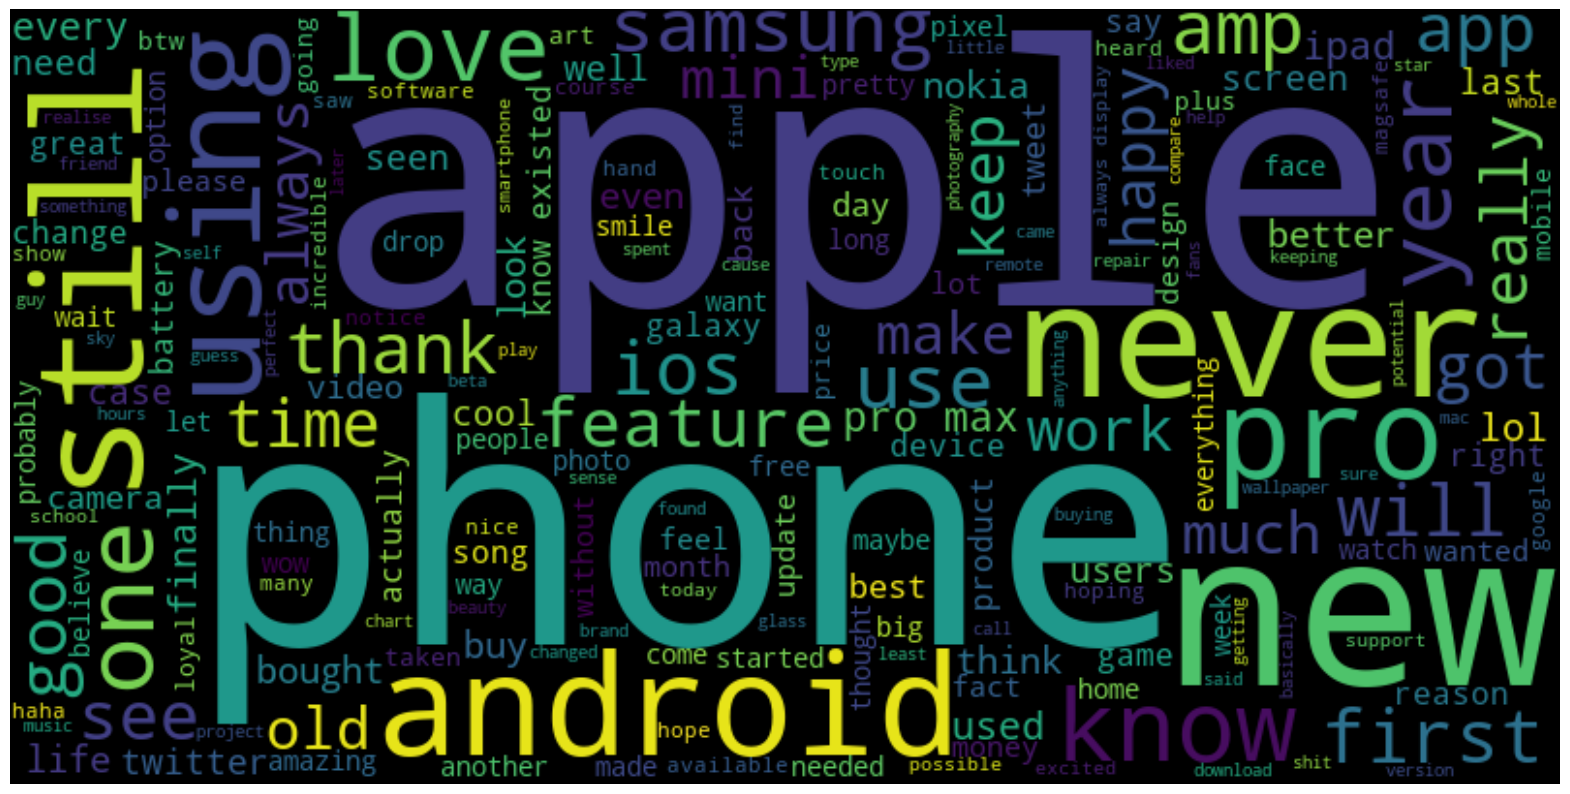

In [44]:
fig = plot_word_cloud(tweet_df, keyword, "positive")
fig.savefig(f"visualisation/figures/{df_name}_world_cloud_pos.png", dpi=400)

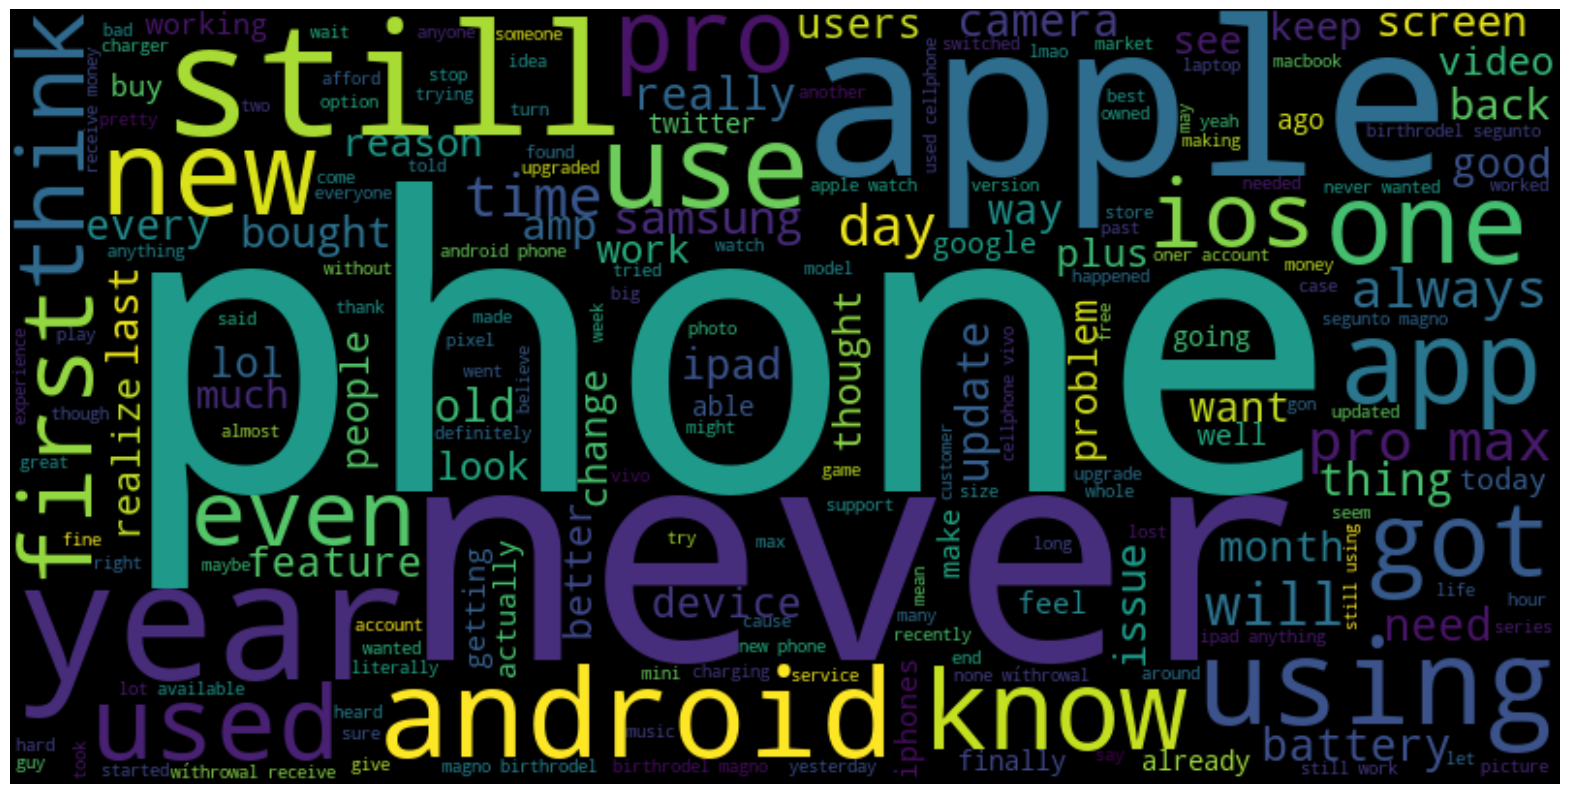

In [45]:
fig = plot_word_cloud(tweet_df, keyword, "negative")
fig.savefig(f"visualisation/figures/{df_name}_world_cloud_neg.png", dpi=400)